# Assignment 2, AIML429

## 1. Using a generative model as a classifier (2/3 of the marks)
For this question you will build your own generator of (fake) data, and explore its use as a classifier. Most of the details are left to you make choices concerning.

### a
Give the joint probability as a mathematical expression. It's important in this field to use notation to say what you mean concisely, so see if you can try to match (roughly) the way that Murphy expresses things.
Remember to give the meaning for any new symbols you use.
### Answer:
<!--  $p(x_{1:n},y_{1:k},\theta_{k,n}) \\
 = p(\pi)p(\theta_{k,n})p(y_{1:k}|\pi)p(x_{1:n}|y_{1:k},\theta_{k,n})\\
 =  p(\pi)[\Pi_{n,k=1}^{n,k} p(m_n)p(\gamma_n)][\Pi_{k=1}^k p(y_k|\pi) \Pi_{n=1}^n p(x_n|y,\theta_{k,n})]$ 
 The parameters $\theta = (\pi, m_{(1:k,1:n)}, \gamma_{(1:k,1:n)})$, k is number of class blow to y, and n is dimensions of x.  -->
 $p(X,Y) 
 = p(Y)p(X|Y)$ \
 $p(y=k,x) = \Pi_k p(x|y=k)$ \
 $ => p(x) = \sum_k \Pi_k p(x|y=k) $

### b
Draw a factor graph representing this model, that includes the parameters.
### Answer:
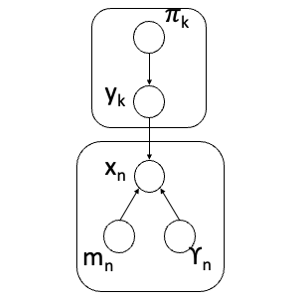

### c
We want to generate a dataset from such a model.
Decide how you want to instantiate parameters, and anything else required to make random samples.
Explain / show what you did to generate a data set from this model.
To confirm it works as intended, exhibit a dataset in just 2-d generated by your model (in x\mathbf{x}x-space, i.e. x1x_1x1​ vs  x2x_2x2​), as a scatter plot. Show the true class via different markers, e.g. colours.
#### Answer:
Plot the 3K of y with 2D x, shows blow:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from scipy.stats import rv_continuous

# RV contimuous function
class exponential(rv_continuous):
    "Exponential distribution"
    def _pdf(self,x,m,gamma):
        return np.exp(-np.abs((x-m)/gamma))
       #return np.abs(np.exp(-(x-m)/gamma))
ex = exponential(name='exponential')

m1=[1, 1]        # k = 0
m2=[2, 3]        # k = 1
m3=[3, 1]        # k = 2
gamma1 = [.85, .90]
gamma2 = [.90, .90]
gamma3 = [.90, .85]


In [2]:

sx11 = np.reshape(ex.rvs(m1[0],gamma1[0], size = 200), (200, 1))
sx21 = np.reshape(ex.rvs(m1[1],gamma1[1], size = 200), (200, 1))

sx12 = np.reshape(ex.rvs(m2[0],gamma2[0], size = 150), (150, 1))
sx22 = np.reshape(ex.rvs(m2[1],gamma2[1], size = 150), (150, 1))

sx13 = np.reshape(ex.rvs(m3[0],gamma3[0], size = 150), (150, 1))
sx23 = np.reshape(ex.rvs(m3[1],gamma3[1], size = 150), (150, 1))

In [3]:
sy1 = np.concatenate((sx11, sx21), axis=1)
sy2 = np.concatenate((sx12, sx22), axis=1)
sy3 = np.concatenate((sx13, sx23), axis=1)

In [4]:
sgy0 = np.zeros((200,))
sgy1 = np.ones((150,))
sgy2 = np.full(150, 2.)
X = np.concatenate((sy1,sy2,sy3), axis = 0)
y = np.concatenate((sgy0,sgy1,sgy2), axis = 0)
y.shape

(500,)

Text(0, 0.5, 'x2')

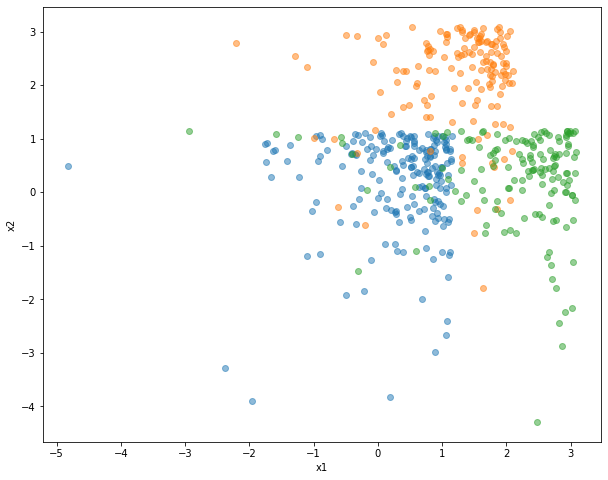

In [5]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(sy1[:,0], sy1[:,1], alpha=0.5)
plt.scatter(sy2[:,0], sy2[:,1], alpha=0.5)
plt.scatter(sy3[:,0], sy3[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

### d
In x\mathbf{x}x-space, the class boundaries generated by this model might not be the simple hyperplanes (or more generally, quadratics) that occur for a mixture of MVNs.
Exhibit the class boundaries on the above scatter plot.
#### Answer:
There are two class boundaries show blow. \\
The first is that boundary gererated by mean of MVNs which is not fit very well of the dataset. \\
The second one is generated by LogisticRegression model, as the accuracy is 95%, it fits the dataset very well.

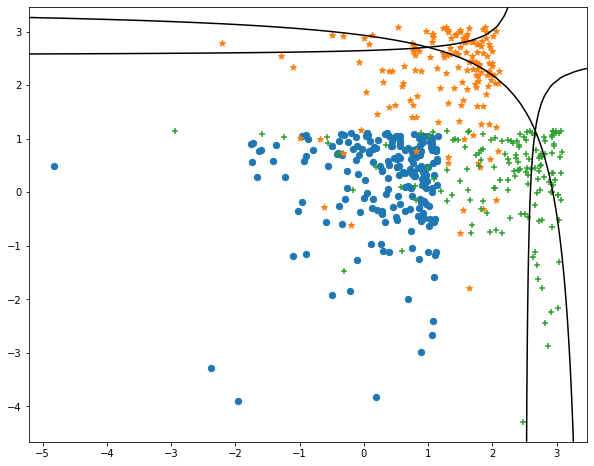

In [6]:
def decision_boundary(x_vec, mu_vec1, mu_vec2):
    g1 = (x_vec - mu_vec1).T.dot((x_vec-mu_vec1))
    g2 = 2.5*( (x_vec-mu_vec2).T.dot((x_vec-mu_vec2)) )
    return g1 - g2

mu_vec1 = np.array(m1)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array(m2)
mu_vec2 = mu_vec2.reshape(1,2).T # to 1-col vector

mu_vec3 = np.array(m3)
mu_vec3 = mu_vec2.reshape(1,2).T # to 1-col vector


f, ax = plt.subplots(figsize=(10, 8))
# c1, c2 = "#3366AA", "#AA3333"
ax.scatter(*sy1.T,  s=40)
ax.scatter(*sy2.T,  marker="*", s=40)
ax.scatter(*sy3.T,  marker="+", s=40)
x_vec = np.linspace(*ax.get_xlim())
y_vec = np.linspace(*ax.get_ylim())
ax.contour(x_vec, y_vec,
           decision_boundary(x_vec, mu_vec1, mu_vec3),
           levels=[0], cmap="Greys_r")
ax.contour(x_vec, y_vec,
           decision_boundary(x_vec, mu_vec3, mu_vec2),
           levels=[0], cmap="Greys_r")



training score : 0.906 (multinomial)


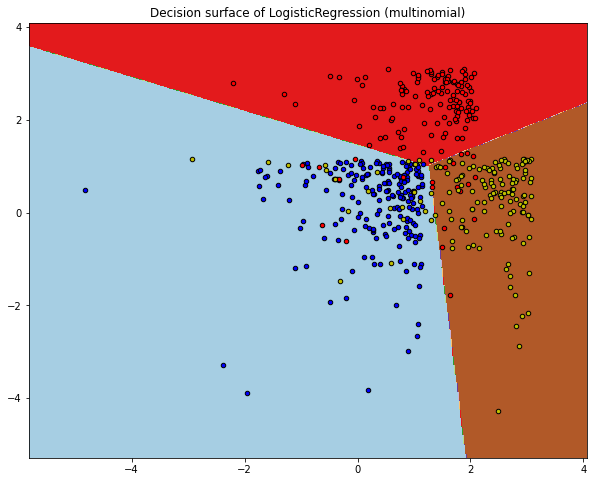

In [7]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="sag", max_iter=100, random_state=42, multi_class='multinomial').fit(X, y)
#clf = LogisticRegression(solver="sag", max_iter=100, random_state=42, multi_class='ovr').fit(X, y)
# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), 'multinomial'))

    # create a mesh to plot in
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z , cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % 'multinomial')
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
            X[idx, 0], X[idx, 1], c = color, cmap=plt.cm.Paired, edgecolor="black", s=20
    )

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_



### e
First, treat this as the data set with which to train a simple "logistic regression" classifier, e.g. softmax of a weighted sum of the inputs. Train it to maximise the log loss of classification errors. It doesn't matter much how you achieve this (autograd, or scikitlearn module, whatever). Show some evidence that this operates as expected, such as the log likelihood increasing over time, say. You might like to check your procedure works by showing the results of running it on your 2d data.
Next, you will use the same data to train your mixture-of-exponentials generative model.



#### Generate the dataset ( x = 3 d, and y = 4 k)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m1=[1, 1, 1]        # k = 0
m2=[2, 3, 4]        # k = 1
m3=[3, 2, 1]        # k = 2
m4=[4, 2, 3]        # k = 3

gamma1 = [.85, .90, 0.85]
gamma2 = [.90, .90, 0.90]
gamma3 = [.90, .85, 0.85]
gamma4 = [.90, .85, 0.90]


sx11 = np.reshape(ex.rvs(m1[0],gamma1[0], size = 200), (200, 1))
sx21 = np.reshape(ex.rvs(m1[1],gamma1[1], size = 200), (200, 1))
sx31 = np.reshape(ex.rvs(m1[2],gamma1[2], size = 200), (200, 1))

sx12 = np.reshape(ex.rvs(m2[0],gamma2[0], size = 150), (150, 1))
sx22 = np.reshape(ex.rvs(m2[1],gamma2[1], size = 150), (150, 1))
sx32 = np.reshape(ex.rvs(m2[2],gamma2[2], size = 150), (150, 1))

sx13 = np.reshape(ex.rvs(m3[0],gamma3[0], size = 150), (150, 1))
sx23 = np.reshape(ex.rvs(m3[1],gamma3[1], size = 150), (150, 1))
sx33 = np.reshape(ex.rvs(m3[2],gamma3[2], size = 150), (150, 1))

sx14 = np.reshape(ex.rvs(m4[0],gamma4[0], size = 250), (250, 1))
sx24 = np.reshape(ex.rvs(m4[1],gamma4[1], size = 250), (250, 1))
sx34 = np.reshape(ex.rvs(m4[2],gamma4[2], size = 250), (250, 1))


sy1 = np.concatenate((sx11, sx21, sx31), axis=1)
sy2 = np.concatenate((sx12, sx22, sx32), axis=1)
sy3 = np.concatenate((sx13, sx23, sx33), axis=1)
sy4 = np.concatenate((sx14, sx24, sx34), axis=1)

sgy0 = np.zeros((200,))
sgy1 = np.ones((150,))
sgy2 = np.full(150, 2.)
sgy3 = np.full(250, 3.)
X = np.concatenate((sy1,sy2,sy3,sy4), axis = 0)
y = np.concatenate((sgy0,sgy1,sgy2,sgy3), axis = 0)

print("X.shape: ", X.shape)
print('y.shape: ', y.shape)

Xcopy,ycopy = X,y

X.shape:  (750, 3)
y.shape:  (750,)


#### Sklearn multinomial LogisticRegression

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Xdata, ydata = Xcopy,ycopy
x_train, x_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.33, random_state=43)
clf = LogisticRegression(solver="sag", max_iter=100, random_state=43, multi_class='multinomial').fit(x_train, y_train)
#clf = LogisticRegression(solver="sag", max_iter=100, random_state=42, multi_class='ovr').fit(X, y)
# print the training scores
print("training score : %.3f (%s)" % (clf.score(x_test, y_test), 'multinomial'))



training score : 0.875 (multinomial)


#### Multi-class Logistic Regression [PyTorch]

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms

Xdata, ydata = Xcopy,ycopy
x_train, x_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.33, random_state=42)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (502, 3)
y_train: (502,)
x_test: (248, 3)
y_test: (248,)


In [11]:
# one hot for multi-class classification
# data = 4 classes [0-3]
y_train_oh = np.zeros((y_train.size, 4))
y_train_oh[np.arange(y_train.size), y_train.astype(int)] = 1
y_test_oh = np.zeros((y_test.size, 4))
y_test_oh[np.arange(y_test.size), y_test.astype(int)] = 1
y_train_oh 

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [12]:
def CrossEntropyLoss_oh(pred, labels):
    return -torch.mean(torch.sum(labels*torch.log(pred), dim=1))

EPOCHS = 8000  # epochs
ALPHA = 0.05  # learning rate
BATCH = 500   # batch size

# m is the number of examples
# n_x is the input size 
m, n_x = x_train.shape

# model
Z = torch.nn.Linear(n_x, 4, bias=True)
torch.nn.init.zeros_(Z.weight)
A = torch.nn.Softmax(dim=1)

# training graph and optimization
optimizer = torch.optim.SGD(Z.parameters(), lr=ALPHA ) #, momentum=0.9)

# loss and accuracy storage
loss_plot = []; accA_plot = []

for epoch in range(EPOCHS + 1):
    # randomic batch definition
    rbatch = np.random.choice(y_train.size, size=BATCH)
    # variables initialization
    X = torch.autograd.Variable(torch.FloatTensor(x_train[rbatch]))
    Y = torch.autograd.Variable(torch.FloatTensor(y_train_oh[rbatch]))
    # training, metrics and storage
    optimizer.zero_grad()
    L = CrossEntropyLoss_oh(A(Z(X)), Y)
    L.backward()
    optimizer.step()

    X_ = torch.autograd.Variable(torch.FloatTensor(x_test))
    Y_ = torch.autograd.Variable(torch.FloatTensor(y_test_oh))

    acc = torch.mean(1 - torch.abs(Y_ - A(Z(X_))))*100
    
    loss_plot += [L]; accA_plot += [acc]
    if (not epoch % 1000) and (epoch != 0):
            print('epoch: {0:04d} | loss: {1:.3f} | accuracy: {2:06.2f} %'.format(epoch, L, acc))
W_ = Z.weight.detach().numpy()
B_ = Z.bias.detach().numpy()
print("The weights of Linear: ")
print(W_)
print("The bias of Linear: ", B_)

epoch: 1000 | loss: 0.482 | accuracy: 084.82 %
epoch: 2000 | loss: 0.466 | accuracy: 086.39 %
epoch: 3000 | loss: 0.461 | accuracy: 086.96 %
epoch: 4000 | loss: 0.502 | accuracy: 087.26 %
epoch: 5000 | loss: 0.403 | accuracy: 087.47 %
epoch: 6000 | loss: 0.395 | accuracy: 087.64 %
epoch: 7000 | loss: 0.450 | accuracy: 087.65 %
epoch: 8000 | loss: 0.430 | accuracy: 087.70 %
The weights of Linear: 
[[-1.1541364  -0.9789113  -1.7832094 ]
 [-0.66689795  0.94794685  2.148403  ]
 [ 0.5105503   0.1758175  -1.4272368 ]
 [ 1.3104949  -0.14485872  1.062039  ]]
The bias of Linear:  [ 4.8563676 -3.8479989  1.573368  -2.7651043]


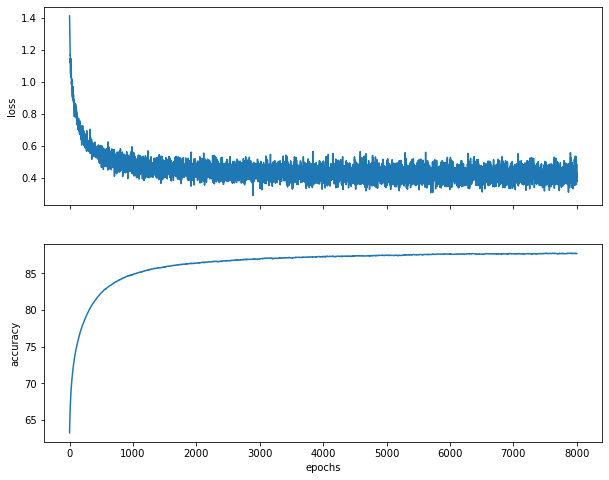

In [13]:

with torch.no_grad():
    fig, [axA, axB] = plt.subplots(2, 1, sharex=True)
    #loss_plot = loss_plot.detach().numpy()
    axA.plot(loss_plot)
    axA.set_ylabel('loss')
    axB.plot(accA_plot)
    axB.set_ylabel('accuracy')

    plt.xlabel('epochs')

    plt.show()

##### e: Answer:
The first method was using sklearn LogisticRegression classification to test the dataset. \
The second method applied Torch Autograd with Linear model by apply loss function during epochs running to find the parameters( weights and bias) of model. The plots of loss and accuracy shows reasonable good process. The loss value was following the increacing accuracy and drop down. 


### f
In Murphy-style notation, write down an expression for what we're maximising, namely log⁡Pr⁡(X)\log \Pr(\mathbf{X}) logPr(X).
#### Answer:
$p(x) = \sum_k \Pi_k p(x|y=k) $ 

$ logPr(X)= log(\sum_k \Pi_k p(x|y=k))$ 

 $ = log(p(x|y=1)p(y=1) $\
 $\;\;\;\;\;+ p(x|y=2)p(y=2) $\
 $\;\;\;\;\;+ ...$\
 $\;\;\;\;\;+p(x|y=k)p(y=k))$ \
 Here: $ p(x_i|y=k) ∝ exp(-|(x_i - m_{ik})/\gamma_{ik}|)$

### g
There are several approaches for fitting π\piπ, m\mathbf{m}m, and γ\gammaγ (e.g. even grid search is on the table). Explain a method and show that it works (maximises the expression in (#f)). I am not particularly bothered about what the method is, so long as it is appropriately motivated/explained, it works, and you can show some evidence of that.
#### Answer:


### h
Why is fitting the parameters of this model somewhat harder than those of the analagous MVN mixture model? (short paragraph).

### i
Would it get much harder to train if the PGM was not factored into the Naive Bayes structure?
(short paragraph).



### j
Use your trained model to classify your x\mathbf{x}x data. Explain how you did this.



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Xdata, ydata = Xcopy, ycopy
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.5, random_state=0)

gnb = GaussianNB()
# gnb = MultinomialNB()

# gnb = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB(alpha=0.01))])
# gnb.fit(X_train,y_train) 


y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))
# print the training scores
print("training score : %.3f (%s)" % (gnb.score(X_test, y_test), 'GaussianNB'))


Number of mislabeled points out of a total 375 points : 49
training score : 0.869 (GaussianNB)


### k
In light of Murphy1 discussion on the pros and cons of Generative vs Discriminative approaches to classification, discuss any differences between what you saw in (#e)




## 2. Gaussian processes and Bayesian Optimisation (1/3 of the marks)